In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.chdir("D:\Fax\ECMI\ECMI_Data\data_1bit\AlpArray")

Read the data from hdf5-files

In [3]:
name_of_stations = ['FR.CALF.00.HHZ', 'FR.EILF.00.HHZ', 'FR.ESCA.01.HHZ', 'FR.MON.00.HHZ', 'FR.MVIF.00.HHZ' ,
         'FR.PRIMA.00.HHZ', 'FR.SAOF.00.HHZ']
pairs_of_statation = []
for i in range(len(name_of_stations)):
    for j in range(i+1, len(name_of_stations)):
        pairs_of_statation.append([name_of_stations[i], name_of_stations[j]])

In [4]:
extracted_data = []
for day in range(183, 365):
    filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "2016" + str(day) + '_local_pair_dist.txt'
    filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"2016" + str(day) + ".h5"

    f = h5py.File(filename, 'r')
    a_group_key = list(f.keys())[0]
    data = list(f[a_group_key])
    file = open(filename_info, mode='r')
    
    lines = []
    for i, line in enumerate(file):
        lines.append(line + " " + str(i))
    splited_lines = []
    for line in lines:
        splited_lines.append(line.split(" "))
    places = []
    for pair in pairs_of_statation:
        for line in splited_lines:
            if (pair[0] in line) and (pair[1] in line):
                places.append(line[5])
                extracted_data.append([data[int(line[5])], pair])

In [5]:
pairs_and_values = {}
for pairs in pairs_of_statation:
    for data in extracted_data:
        if pairs == data[1]:
            if pairs[0] + " " + pairs[1] not in pairs_and_values:
                pairs_and_values.update({pairs[0] + " " + pairs[1]: data[1]})
            pairs_and_values[pairs[0] + " " + pairs[1]].append(data[0])

In [6]:
sorted_values = {}
for key in pairs_and_values.keys():
    holder = pairs_and_values[key][2:]
    values = []
    for value in holder:
        values.extend(value[0])
    sorted_values.update({key:values})

In [7]:
max_number_of_connection = 0
for value in sorted_values.values():
    if len(value) > max_number_of_connection:
        max_number_of_connection = len(value)
connectedes = []
for key, value in sorted_values.items():
    connectedes.append([key, len(value)/max_number_of_connection])

In [8]:
connectedes

[['FR.CALF.00.HHZ FR.EILF.00.HHZ', 1.0],
 ['FR.CALF.00.HHZ FR.ESCA.01.HHZ', 1.0],
 ['FR.CALF.00.HHZ FR.MON.00.HHZ', 0.28654970760233917],
 ['FR.CALF.00.HHZ FR.MVIF.00.HHZ', 0.9941520467836257],
 ['FR.CALF.00.HHZ FR.PRIMA.00.HHZ', 0.4853801169590643],
 ['FR.CALF.00.HHZ FR.SAOF.00.HHZ', 0.9064327485380117],
 ['FR.EILF.00.HHZ FR.ESCA.01.HHZ', 1.0],
 ['FR.EILF.00.HHZ FR.MON.00.HHZ', 0.2222222222222222],
 ['FR.EILF.00.HHZ FR.MVIF.00.HHZ', 0.9941520467836257],
 ['FR.EILF.00.HHZ FR.PRIMA.00.HHZ', 0.42105263157894735],
 ['FR.EILF.00.HHZ FR.SAOF.00.HHZ', 0.9064327485380117],
 ['FR.ESCA.01.HHZ FR.MON.00.HHZ', 0.2222222222222222],
 ['FR.ESCA.01.HHZ FR.MVIF.00.HHZ', 0.9941520467836257],
 ['FR.ESCA.01.HHZ FR.PRIMA.00.HHZ', 0.42105263157894735],
 ['FR.ESCA.01.HHZ FR.SAOF.00.HHZ', 0.9064327485380117],
 ['FR.MON.00.HHZ FR.MVIF.00.HHZ', 0.21637426900584794],
 ['FR.MON.00.HHZ FR.PRIMA.00.HHZ', 0.27485380116959063],
 ['FR.MON.00.HHZ FR.SAOF.00.HHZ', 0.21637426900584794],
 ['FR.MVIF.00.HHZ FR.PRIMA.00.HHZ

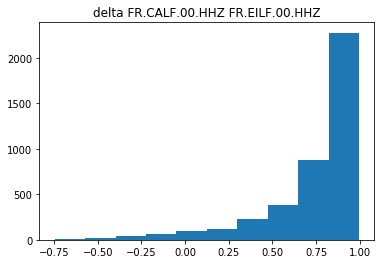

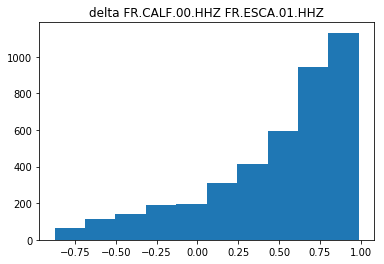

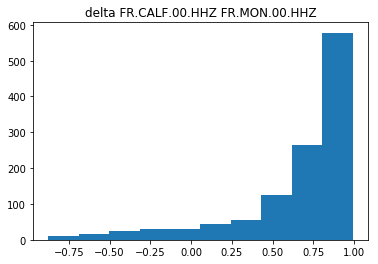

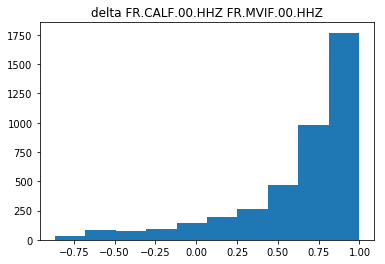

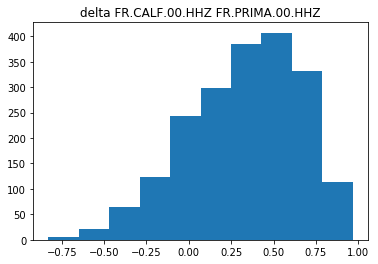

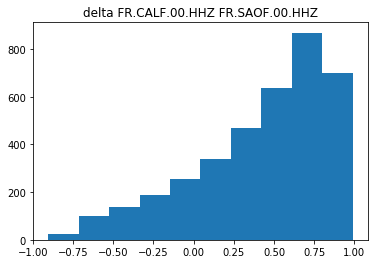

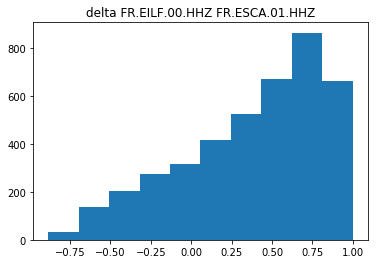

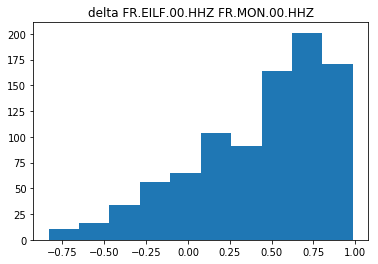

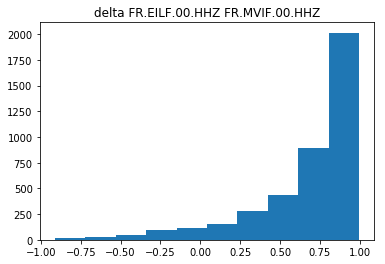

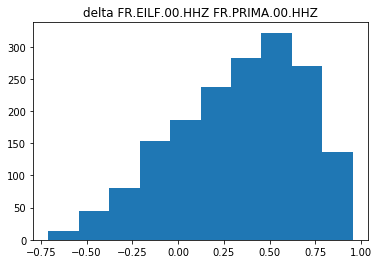

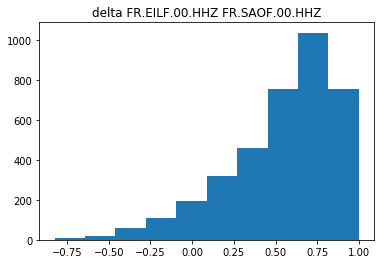

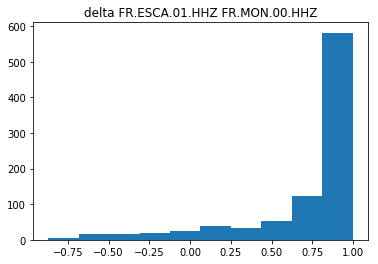

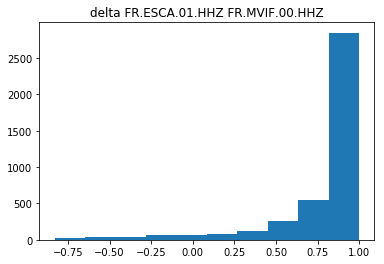

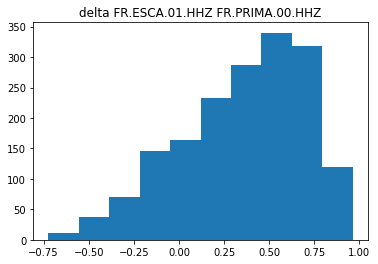

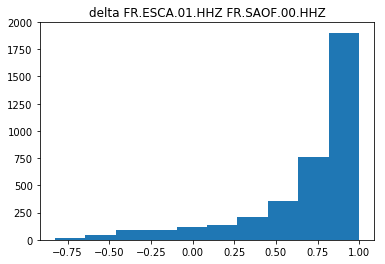

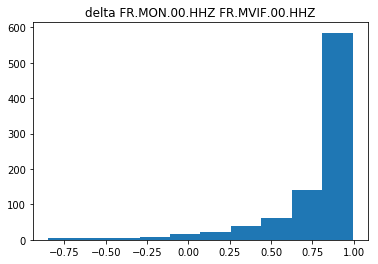

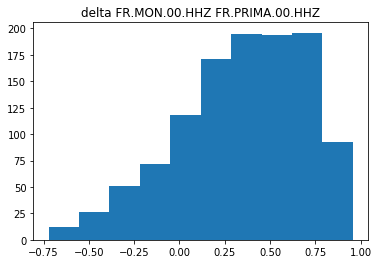

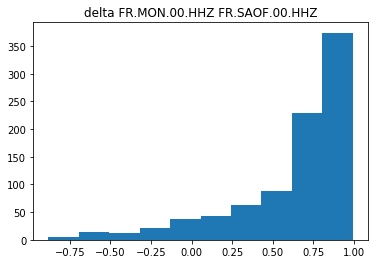

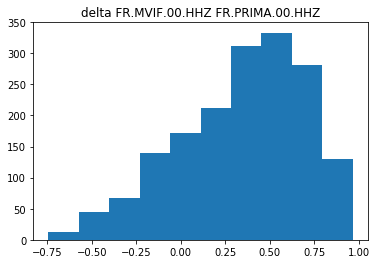

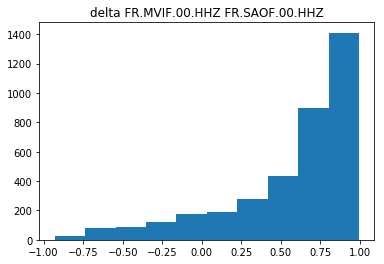

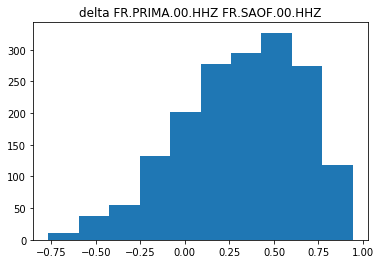

In [9]:
for keys, values in sorted_values.items():
    plt.hist(values)
    plt.title("delta %s" %(keys)) 
    plt.show()

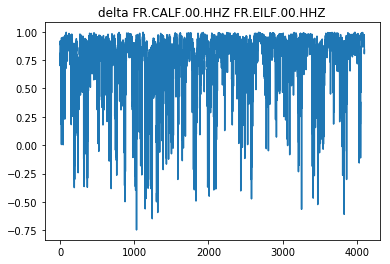

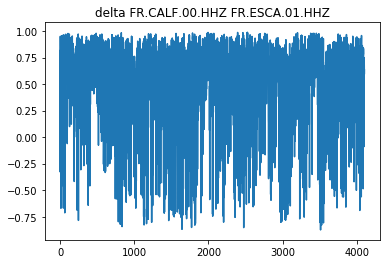

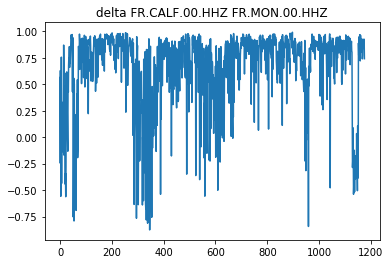

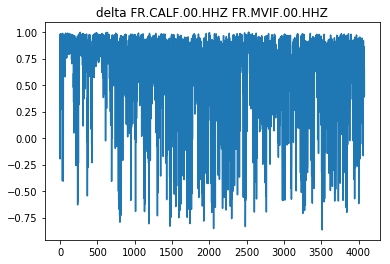

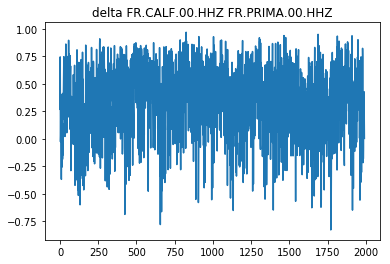

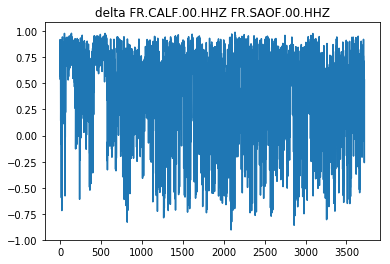

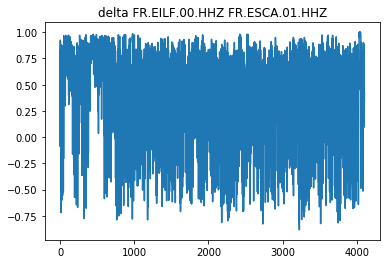

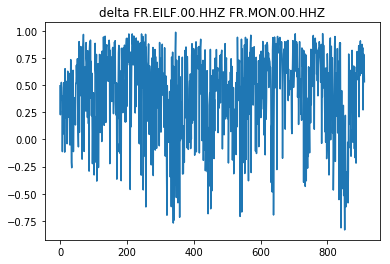

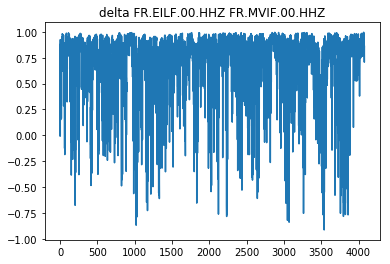

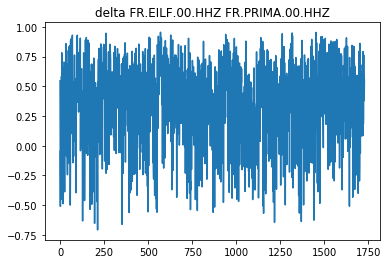

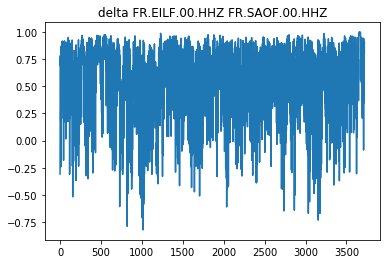

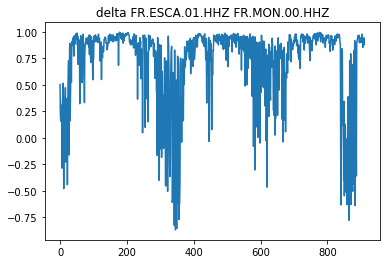

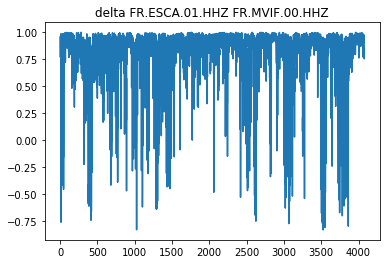

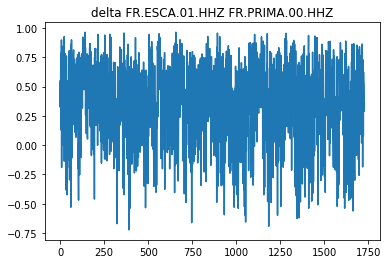

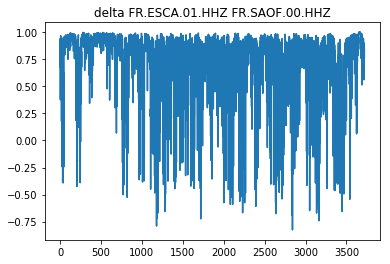

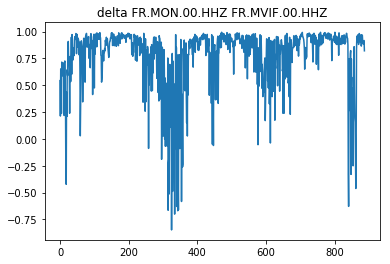

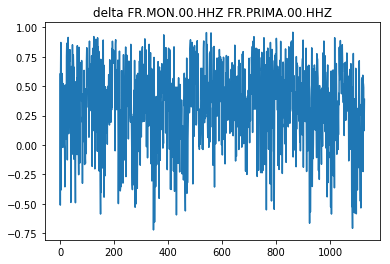

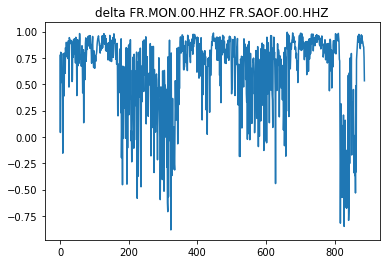

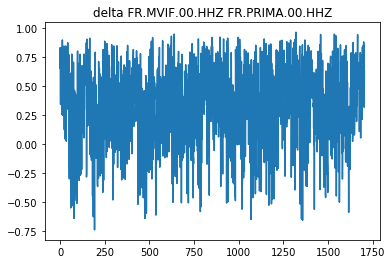

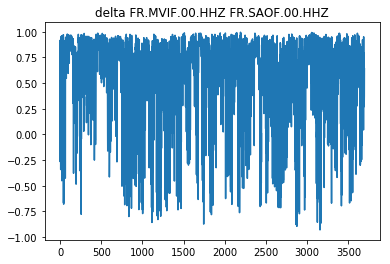

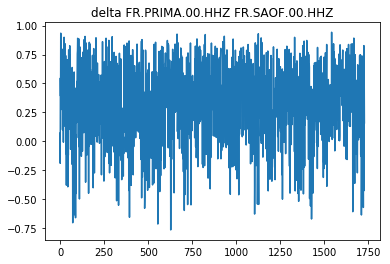

In [10]:
for keys, values in sorted_values.items():
    plt.plot(values)
    plt.title("delta %s" %(keys)) 
    plt.show()